In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
from functions import *

In [2]:
def deflection(x, Mp, Fx):
    if Fx == 0.0:
        Fx = 1e-5
    k = np.sqrt(Fx)
    y = (Mp/Fx)*(np.sin(k*(L-x))/np.sin(k*L) - (L-x)/L)
    return y

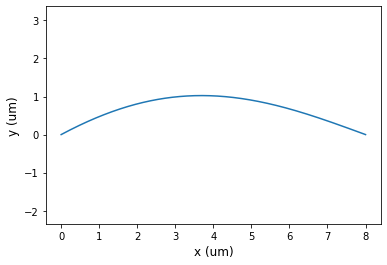

In [3]:
Mp = 0.114 # Moment at the pole (EI um^-1)
Fx = 0.084 # Axial force (EI um^-2)
L = 8 # End-to-end distance (um)

x = np.linspace(0, L, 1000)
y = deflection(x, Mp, Fx)

plt.plot(x,y)
plt.axis('equal')
plt.xlabel('x (um)', fontsize=12)
plt.ylabel('y (um)', fontsize=12)
plt.show()

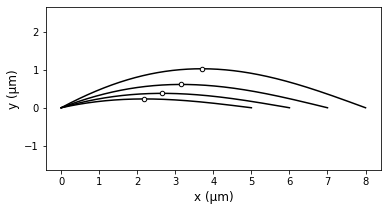

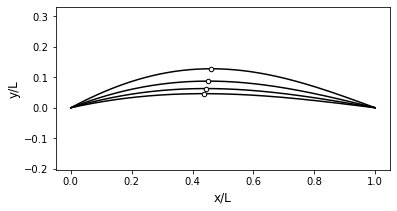

In [4]:
plt.figure(figsize=(6, 3.0))
for L in [5, 6, 7, 8]:
    x = np.linspace(0, L, 10000)
    y = deflection(x, Mp, Fx)
    
    x_max = x[np.where(y == y.max())][0]
    y_max = y.max()
    
    plt.plot(x, y, color='k')
    plt.scatter(x_max, y_max, s=20, color='w', edgecolor='k', zorder=2)
    
plt.axis('equal')
plt.xlabel('x (µm)', fontsize=12)
plt.ylabel('y (µm)', fontsize=12)
plt.savefig('fig_outputs/max_deflection_profiles_unnormalized.pdf')
plt.show()


plt.figure(figsize=(6, 3.0))
L_choices = [5, 6, 7, 8]
for L in L_choices:
    x = np.linspace(0, L, 10000)
    y = deflection(x, Mp, Fx)
    
    x_max = x[np.where(y == y.max())][0]
    y_max = y.max()
    
    plt.plot(x/L, y/L, color='k')
    plt.scatter(x_max/L, y_max/L, s=20, color='w', edgecolor='k', zorder=2)
    
plt.axis('equal')
plt.xlabel('x/L', fontsize=12)
plt.ylabel('y/L', fontsize=12)
plt.savefig('fig_outputs/max_deflection_profiles_normalized.pdf')
plt.show()

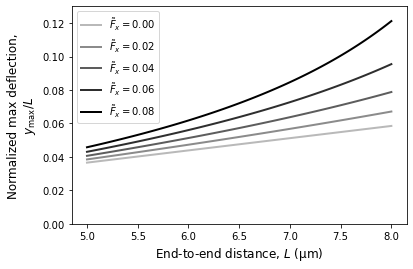

In [8]:
Fx_choices = [0.0, 0.02, 0.04, 0.06, 0.08]
for Fx in Fx_choices:

    y_max_norm = []
    L_values = np.linspace(5, 8, 100)

    for L in L_values:
        x = np.linspace(0, L, 10000)
        y = deflection(x, Mp, Fx)

        y_max_norm.append(y.max()/L)
    
    color = 1 - np.full((1,3), 1) * (0.03 + Fx)/(0.03 + np.max(Fx_choices))
    plt.plot(L_values, y_max_norm, color=color, lw=2.0, label = r'$\tilde{F}_x = %.2f$'%Fx)
    
plt.legend()
plt.xlabel(r'End-to-end distance, $L$ (µm)', fontsize=12)
plt.ylabel(r'Normalized max deflection,' "\n" r'$y_{\rm max}/L$', fontsize=12)
plt.ylim((.00, 0.13))

plt.savefig('fig_outputs/max_deflection_y_max_dependence_L.pdf')
plt.show()

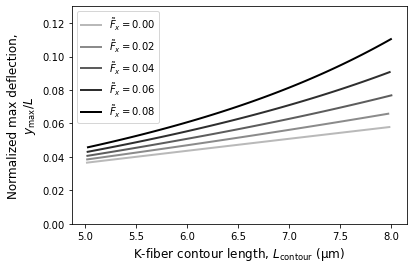

In [9]:
Fx_choices = [0.0, 0.02, 0.04, 0.06, 0.08]
for Fx in Fx_choices:

    y_max_norm = []
    L_values = np.linspace(5, 8, 100)
    L_contour_values = []
    
    for L in L_values:
        x = np.linspace(0, L, 10000)
        y = deflection(x, Mp, Fx)

        y_max_norm.append(y.max()/L)
        L_contour_values.append(contour_fn(x, y)[1])
    
    L_contour_values = np.array(L_contour_values)
    y_max_norm = np.array(y_max_norm)
    ind = np.where(L_contour_values <= L_values.max())[0]
    
    color = 1 - np.full((1,3), 1) * (0.03 + Fx)/(0.03 + np.max(Fx_choices))
    plt.plot(L_contour_values[ind], y_max_norm[ind], color=color, lw=2.0, label = r'$\tilde{F}_x = %.2f$'%Fx)
    
plt.legend()
plt.xlabel(r'K-fiber contour length, $L_{\rm contour}$ (µm)', fontsize=12)
plt.ylabel(r'Normalized max deflection,' "\n" r'$y_{\rm max}/L$', fontsize=12)
plt.ylim((.00, 0.13))

plt.savefig('fig_outputs/max_deflection_y_max_dependence_L_contour.pdf')
plt.show()